Let us look at the difference between accelerated gradient and _usual_ gradient descent. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# import our homemade stuff: 
# Failing projected methods: 
from helper import accelerated_projected_gradient_descent_dummy, projected_gradient_descent_dummy
# Start with the _slow_ gradient descents
from helper import gradient_descent, projected_gradient_descent
# Accelerated variants
from helper import accelerated_gradient_descent, accelerated_projected_gradient_descent
# Plotting stuff 
from helper import  plot_descent
# Projection operators 
from helper import proj_l2



Iter: 10. Iterate: [ -1.         -13.03164403]. Norm gradient: 0.23110996754824967
Iter: 20. Iterate: [ -1.         -15.45209656]. Norm gradient: 0.05990144945534892
Iter: 30. Iterate: [ -1.         -14.85277766]. Norm gradient: 0.019977743034058637
Iter: 40. Iterate: [ -1.         -15.05566038]. Norm gradient: 0.007496429306416363
Iter: 50. Iterate: [ -1.         -14.97717534]. Norm gradient: 0.0029972720875210968
Iter: 60. Iterate: [ -1.         -15.00983312]. Norm gradient: 0.0012410649003253837
Iter: 70. Iterate: [ -1.         -14.99562862]. Norm gradient: 0.0005224708847912929
Iter: 80. Iterate: [ -1.         -15.00198243]. Norm gradient: 0.0002203428900964255
Exiting AGD after 81 iterations. Final result is [ -1.         -15.00099154] and norm of gradient is 7.559762151387872e-06


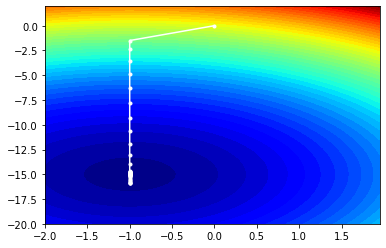

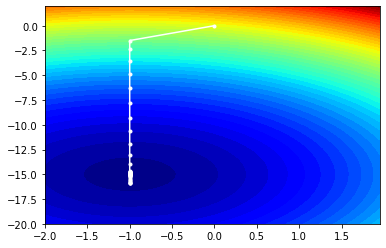

In [2]:
c = np.array([2,3])

f0 = lambda x, kappa: 1*x[0]**2 + kappa*x[1]**2 + x.dot(c)
g0 = lambda x, kappa: np.array([x[0] , kappa*x[1]])*2 + c
Q = lambda kappa: np.array([[1,0], [0, kappa]])

L_smoothness = lambda kappa: 2*max([1, kappa])

# First test
aKappa = 0.1
x0 = np.array([0,0])
[xstar, x_iter] = accelerated_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, gamma = 1/L_smoothness(aKappa), verbose = 10)


plot_descent(lambda x: f0(x,aKappa), [-2,2], [-20,2], x_iter)

Let us look now at projections onto the $\ell_2$ balls of radius $R = 2$. 

Exiting algo after 2001 iterations. Final result is [-0.59334593 -1.90995827] and norm of gradient is 2.7414298860296484


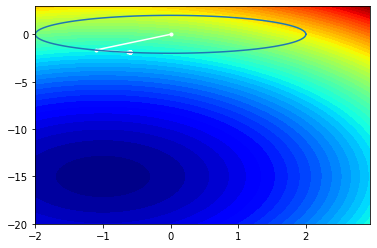

In [17]:
R = 2 
proj = lambda x: proj_l2(x,R)

[xstar, x_iter] = projected_gradient_descent_dummy(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa), proj, x0, gamma = 1/L_smoothness(aKappa), maxNbIter = 2000, eps_grad = 1e-6, verbose = 0)
ax = plot_descent(lambda x: f0(x,aKappa), [-2,3], [-20,3], x_iter)

angles = np.linspace(0, 2*np.pi, 100)
plt.plot(R*np.cos(angles), R*np.sin(angles))
#plt.ylim([-7,3])

Exiting algo after 7 iterations. Final result is [-0.59334594 -1.90995827] and norm of delta x is 2.0070686774050566e-07


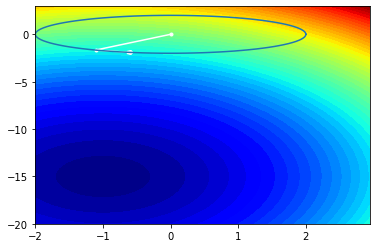

In [18]:
R = 2 
proj = lambda x: proj_l2(x,R)

[xstar, x_iter] = projected_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa), proj, x0, gamma = 1/L_smoothness(aKappa), maxNbIter = 2000, eps_grad = 1e-6, verbose = 0)
ax = plot_descent(lambda x: f0(x,aKappa), [-2,3], [-20,3], x_iter)

angles = np.linspace(0, 2*np.pi, 100)
plt.plot(R*np.cos(angles), R*np.sin(angles))
#plt.ylim([-7,3])

In [19]:
R = 2 
proj = lambda x: proj_l2(x,R)

[xstar, x_iter] = accelerated_projected_gradient_descent_dummy(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa), proj, x0, gamma = 1/L_smoothness(aKappa), maxNbIter = 2000, eps_grad = 1e-6, verbose = 0)
ax = plot_descent(lambda x: f0(x,aKappa), [-2,3], [-20,3], x_iter)

angles = np.linspace(0, 2*np.pi, 100)
plt.plot(R*np.cos(angles), R*np.sin(angles))
#plt.ylim([-7,3])

NameError: name 'accelerated_projected_gradient_descent_dummy' is not defined

In [ ]:
R = 2 
proj = lambda x: proj_l2(x,R)

[xstar, x_iter] = accelerated_projected_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa), proj, x0, gamma = 1/L_smoothness(aKappa), maxNbIter = 2000, eps_grad = 1e-6, verbose = 0)
ax = plot_descent(lambda x: f0(x,aKappa), [-2,3], [-20,3], x_iter)

angles = np.linspace(0, 2*np.pi, 100)
plt.plot(R*np.cos(angles), R*np.sin(angles))
#plt.ylim([-7,3])

Let us now look at hte difference with the usual gradient method without exact line search 

In [ ]:
# Third test
aKappa = 0.1
x0 = np.array([0,0])
[xstar, x_iter] = gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-7,2], x_iter)

In [ ]:
aKappa = 0.01
x0 = np.array([0,0])
[xstar, x_iter] = accelerated_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 50)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-52,2], x_iter)

[xstar, x_iter] = gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 50)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-52,2], x_iter)


We want to now look at the number of iterations required, as well as the decrease per iterations, as a function of the condition number. 

In [ ]:
kappas = [0.001,0.004,0.01,0.04,0.1,0.4,1,4,10,40,100,400,1000]
nbIterations = []

for aKappa in kappas: 
    [xstar, x_iter] = accelerated_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 500)
    nbIterations.append(len(x_iter))

In [ ]:
plt.plot(np.log(kappas), nbIterations)
plt.xlabel('Log of kappa')
plt.ylabel('Number of iterations')

In [ ]:
c = np.array([1,1,1])

f0 = lambda x, kappa: 1*x[0]**2 + kappa*x[1]**2 + kappa**2*x[2]**2 + x.dot(c)
g0 = lambda x, kappa: np.array([x[0] , kappa*x[1], kappa**2*x[2]])*2 + c
Q = lambda kappa: np.array([[1,0,0], [0, kappa,0], [0,0,kappa**2]])

L_smoothness = lambda kappa: max([kappa**2, kappa**(-2)])

aKappa = 0.05
x0 = np.array([0,0,0])
[xstar, x_iter] = gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 500)


target_val = f0(xstar,aKappa)

decreases = np.zeros(len(x_iter) - 1)

for i in range(0,len(x_iter)-1): 
    decreases[i-1] = (f0(x_iter[i],aKappa) - target_val)/(f0(x_iter[i-1],aKappa) - target_val)
    
plt.figure()
from_end = 20
plt.plot(range(2,len(x_iter)-from_end), decreases[1:-from_end])

In [ ]:
decreases[1:20]

In [ ]:
def cond_number(kappa, dim): 
    '''Assumes a n x n matrix, with 1,kappa, kappa**2 etc ... on the diagonal'''
    if kappa >=1: return kappa**(dim-1) 
    return kappa**(1-dim)

q_number = cond_number(aKappa,3)
magic_number = ((q_number-1)/(q_number+1))**2
print("Upper bound is {}".format(magic_number))